In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2089s 12us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

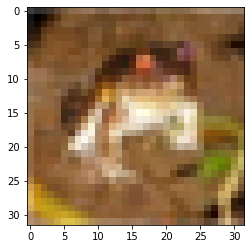

In [8]:
# x_train[0]
plt.imshow(x_train[0])

In [7]:
x_train[0].max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [16]:
# CIFAR 10 Labels 6 - Corresponds to a frog (Similarly 0-9)

y_train[0]

array([6], dtype=uint8)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
# MNIST 28*28 = 724
# These are more complex images. as a result 32*32*3 = 3072
# So, add another convolution and another pooling layer

model = Sequential()

# Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size = (2, 2)))

# Convolution Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [23]:
model.fit(x_train, y_cat_train, epochs = 20, validation_data = (x_test, y_cat_test),
         callbacks = [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.4853 - accuracy: 0.4630 - val_loss: 1.2764 - val_accuracy: 0.5472
Epoch 2/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.1489 - accuracy: 0.5962 - val_loss: 1.1055 - val_accuracy: 0.6114
Epoch 3/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9982 - accuracy: 0.6493 - val_loss: 1.0269 - val_accuracy: 0.6377
Epoch 4/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8946 - accuracy: 0.6870 - val_loss: 0.9649 - val_accuracy: 0.6667
Epoch 5/20
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.8014 - accuracy: 0.7200 - val_loss: 0.9617 - val_accuracy: 0.6700
Epoch 6/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.7207 - accuracy: 0.7483 - val_loss: 0.9313 - val_accuracy: 0.6848
Epoch 7/20
50000/50000 [==============================] 

In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.485276,0.46300,1.276407,0.5472
1,1.148851,0.59616,1.105543,0.6114
2,0.998168,0.64928,1.026909,0.6377
3,0.894623,0.68704,0.964859,0.6667
4,0.801404,0.71998,0.961742,0.6700
5,0.720657,0.74830,0.931256,0.6848
6,0.649385,0.77142,0.976734,0.6713
7,0.581840,0.79642,1.044755,0.6591


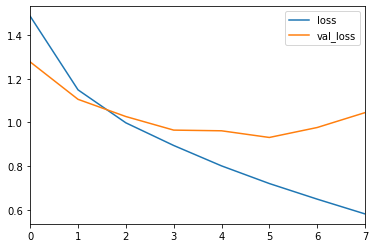

In [26]:
metrics[['loss', 'val_loss']].plot()

In [27]:
model.evaluate(x_test, y_cat_test, verbose = 0)

[1.044754719543457, 0.6591]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
predictions = model.predict_classes(x_test)

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.76      0.83      0.79      1000
           2       0.56      0.58      0.57      1000
           3       0.41      0.58      0.49      1000
           4       0.78      0.40      0.53      1000
           5       0.51      0.58      0.54      1000
           6       0.81      0.70      0.75      1000
           7       0.78      0.67      0.72      1000
           8       0.82      0.70      0.76      1000
           9       0.72      0.79      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



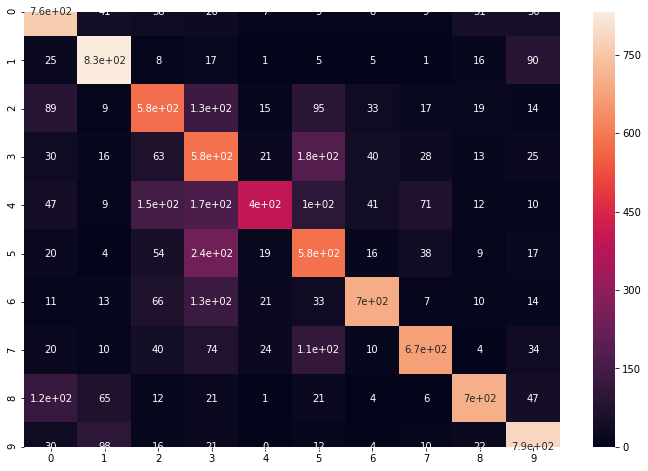

In [35]:
# It tends to be poor on class-2(bird),3(cat),4(deer),5(dog)
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [36]:
my_image = x_test[0]

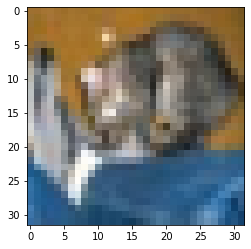

In [37]:
plt.imshow(my_image)

In [39]:
y_test[0]

# A cat

array([3], dtype=uint8)

In [40]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)